# Import TF and Dataset

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

fasion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fasion_mnist.load_data()

C:\Users\cdurrans\AppData\Local\Continuum\anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


4423680/4422102 [==============================] - 0s 0us/step


## Explore the data

picture_size: 28 x 28
picture_label: 9


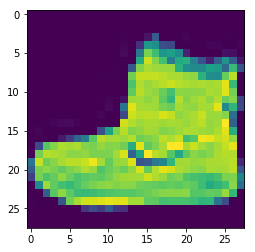

In [2]:
img = 0

print("picture_size:",len(train_images[img]),"x",len(train_images[img][0]))
print("picture_label:",train_labels[img])
plt.imshow(train_images[img])

In [3]:
pd.set_option('display.max_columns', None)
test = pd.DataFrame(data=train_images[img])
test

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,13,73,0,0,1,4,0,0,0,0,1,1,0
4,0,0,0,0,0,0,0,0,0,0,0,0,3,0,36,136,127,62,54,0,0,0,1,3,4,0,0,3
5,0,0,0,0,0,0,0,0,0,0,0,0,6,0,102,204,176,134,144,123,23,0,0,0,0,12,10,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,155,236,207,178,107,156,161,109,64,23,77,130,72,15
7,0,0,0,0,0,0,0,0,0,0,0,1,0,69,207,223,218,216,216,163,127,121,122,146,141,88,172,66
8,0,0,0,0,0,0,0,0,0,1,1,1,0,200,232,232,233,229,223,223,215,213,164,127,123,196,229,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0,183,225,216,223,228,235,227,224,222,224,221,223,245,173,0


## Normalize the data

In [4]:
train_images = train_images / 255.0
test_images = test_images / 255.0

## Build the model

In [5]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [6]:
history = model.fit(train_images, train_labels, validation_split=0.1, epochs=5)

Train on 54000 samples, validate on 6000 samples
Epoch 1/5
54000/54000 [==============================] - 3s 54us/step - loss: 0.5054 - val_loss: 0.4108
Epoch 2/5
54000/54000 [==============================] - 3s 49us/step - loss: 0.3779 - val_loss: 0.3778
Epoch 3/5
54000/54000 [==============================] - 3s 48us/step - loss: 0.3385 - val_loss: 0.3494
Epoch 4/5
54000/54000 [==============================] - 3s 47us/step - loss: 0.3146 - val_loss: 0.3577
Epoch 5/5
54000/54000 [==============================] - 3s 50us/step - loss: 0.2954 - val_loss: 0.3383


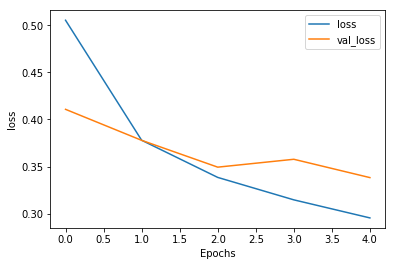

In [7]:
def plot_acc(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

plot_acc(history,'loss')

### Add Callbacks

In [8]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('loss')<0.2):
            print("\nLoss threshold reached")
            self.model.stop_training = True

In [9]:
model.fit(train_images, train_labels,  epochs=5, callbacks=[myCallback()])

Epoch 1/5
60000/60000 [==============================] - 3s 49us/step - loss: 0.2882
Epoch 2/5
60000/60000 [==============================] - 3s 47us/step - loss: 0.2757
Epoch 3/5
60000/60000 [==============================] - 3s 46us/step - loss: 0.2618
Epoch 4/5
60000/60000 [==============================] - 3s 45us/step - loss: 0.2510
Epoch 5/5
60000/60000 [==============================] - 3s 46us/step - loss: 0.2433


## Convolutions and Pooling

In [10]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3),activation='relu',
                          input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               204928    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total para

In [11]:
train_images = train_images.reshape([-1,28, 28,1])
history = model.fit(train_images, train_labels, validation_split=0.1, batch_size=128, epochs=5, callbacks=[myCallback()])

Train on 54000 samples, validate on 6000 samples
Epoch 1/5
54000/54000 [==============================] - 53s 974us/step - loss: 0.5387 - acc: 0.8078 - val_loss: 0.3783 - val_acc: 0.8578
Epoch 2/5
54000/54000 [==============================] - 50s 932us/step - loss: 0.3491 - acc: 0.8739 - val_loss: 0.3181 - val_acc: 0.8870
Epoch 3/5
54000/54000 [==============================] - 54s 996us/step - loss: 0.3001 - acc: 0.8909 - val_loss: 0.2921 - val_acc: 0.8960
Epoch 4/5
54000/54000 [==============================] - 61s 1ms/step - loss: 0.2684 - acc: 0.9016 - val_loss: 0.2683 - val_acc: 0.9018
Epoch 5/5
54000/54000 [==============================] - 59s 1ms/step - loss: 0.2452 - acc: 0.9098 - val_loss: 0.2627 - val_acc: 0.9055


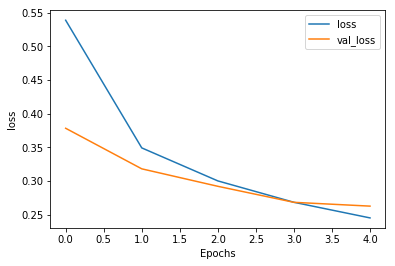

In [13]:
plot_acc(history,'loss')

## Convolution/Pooling Visualized

In [ ]:
f, axarr = plt.subplots(3,4)
first_image=0
second_image=23
third_image=28
conv_number = 1
layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)
for x in range(0,4):
    f1 = activation_model.predict(test_images[first_image].reshape(1,28,28,1))[x]
    axarr[0,x].imshow(f1[0, :, :, conv_number], cmap='inferno')
    axarr[0,x].grid(False)
    f2 = activation_model.predict(test_images[second_image].reshape(1,28,28,1))[x]
    axarr[1,x].imshow(f2[0, :, :, conv_number], cmap='inferno')
    axarr[1,x].grid(False)
    f3 = activation_model.predict(test_images[third_image].reshape(1,28,28,1))[x]
    axarr[2,x].imshow(f3[0, :, :, conv_number], cmap='inferno')
    axarr[2,x].grid(False)

In [ ]:
f, axarr = plt.subplots(3,4)
first_image=0
second_image=23
third_image=1
conv_number = 1
layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)
for x in range(0,4):
    f1 = activation_model.predict(test_images[first_image].reshape(1,28,28,1))[x]
    axarr[0,x].imshow(f1[0, :, :, conv_number], cmap='inferno')
    axarr[0,x].grid(False)
    f2 = activation_model.predict(test_images[second_image].reshape(1,28,28,1))[x]
    axarr[1,x].imshow(f2[0, :, :, conv_number], cmap='inferno')
    axarr[1,x].grid(False)
    f3 = activation_model.predict(test_images[third_image].reshape(1,28,28,1))[x]
    axarr[2,x].imshow(f3[0, :, :, conv_number], cmap='inferno')
    axarr[2,x].grid(False)

In [ ]:
import matplotlib.pyplot as plt
f, axarr = plt.subplots(3,4)
FIRST_IMAGE=0
SECOND_IMAGE=23
THIRD_IMAGE=1
CONVOLUTION_NUMBER = 4
from tensorflow.keras import models
layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)
for x in range(0,4):
    f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
    axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
    axarr[0,x].grid(False)
    f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
    axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
    axarr[1,x].grid(False)
    f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
    axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
    axarr[2,x].grid(False)

## Transfer Learning

In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

pre_trained_model = InceptionV3(input_shape = (75, 75, 1),
                                include_top = True,
                                weights = None)

In [ ]:
for layer in pre_trained_model.layers:
    layer.trainable = False
    
pre_trained_model.summary()

In [ ]:
last_layer = pre_trained_model.get_layer('mixed7')
last_output = last_layer.output

In [ ]:
x = tf.keras.layers.Flatten()(last_output)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dropout(0.1)(x)
x = tf.keras.layers.Dense(512, activation='relu')(x)
x = tf.keras.layers.Dropout(0.1)(x)
x = tf.keras.layers.Dense(256, activation='relu')(x)
x = tf.keras.layers.Dense(10, activation='softmax')(x)
model = tf.keras.Model( pre_trained_model.input, x)

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

### Reshape Images

In [ ]:
import numpy as np

X_data_resized = []
for image in train_images:
    img = image.copy()
    img.resize(75,75,1)
    X_data_resized.append(img)

In [ ]:
np.array(X_data_resized).shape

## Final Training

In [ ]:
history = model.fit(np.array(X_data_resized), train_labels, batch_size=500, epochs=1)